In [1]:
import sys
sys.path.append('/home/ivan/distribution_connector')
import os

from sklearn.decomposition import TruncatedSVD


In [2]:
from sklearn import datasets
import numpy as np
import torch
from tqdm import tqdm
from connector_utils import test_models, gather_statistics, test_func
import matplotlib.pyplot as plt

In [3]:
from connector import Connector
# from one_layer_utils import samples, make_dataset, get_model, get_b
from utils import test_model
from tqdm import tqdm

In [7]:
import models
architecture = getattr(models, "LinearOneLayer") #LinearOneLayer LogRegression

import data
loaders, num_classes = data.loaders(
    "MNIST",
    "data",
    1024,
    1,
    "VGG",
    True,
    train_random=True,
    shuffle_train=False)

model1 = architecture.base(num_classes=10, **architecture.kwargs)
model2 = architecture.base(num_classes=10, **architecture.kwargs)

model1.load_state_dict(torch.load('curves_mnist/LinearOneLayer/LongTraining/curve1/checkpoint-30.pt')['model_state'])
model2.load_state_dict(torch.load('curves_mnist/LinearOneLayer/LongTraining/curve2/checkpoint-30.pt')['model_state'])


You are going to run models on the test set. Are you sure?


IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [9]:
model1.cuda()
model2.cuda()
stat = {'train': [], 'test': []}
for i in tqdm(range(3, 6)):
    model1.load_state_dict(torch.load('curves_mnist/LinearOneLayer/LongTraining/curve'+str(i)+'/checkpoint-30.pt')['model_state'])
    res = test_model(model1, loaders, cuda=True)
    stat['train'].append(res[0]['accuracy'])
    stat['test'].append(res[1]['accuracy'])


 33%|███▎      | 1/3 [00:07<00:15,  7.75s/it]

train results {'nll': 0.03940047733187675, 'loss': 0.03940047733187675, 'accuracy': 99.12833333333333}
test results {'nll': 0.06816846108436585, 'loss': 0.06816846108436585, 'accuracy': 97.98}


 67%|██████▋   | 2/3 [00:15<00:07,  7.77s/it]

train results {'nll': 0.03900473463932673, 'loss': 0.03900473463932673, 'accuracy': 99.13666666666667}
test results {'nll': 0.06703689527511597, 'loss': 0.06703689527511597, 'accuracy': 97.99}


100%|██████████| 3/3 [00:23<00:00,  7.82s/it]

train results {'nll': 0.03899497308731079, 'loss': 0.03899497308731079, 'accuracy': 99.15166666666667}
test results {'nll': 0.0677187137722969, 'loss': 0.0677187137722969, 'accuracy': 97.99}


In [10]:
# np.array(stat['train']).std(), np.array(stat['test']).std()

In [11]:
# model1.cuda();
# model1.eval();
# test_model(model1, loaders, cuda=True)

In [12]:
# model2.cuda();
# model2.eval();
# test_model(model2, loaders, cuda=True)

In [25]:
def get_data(data_type='train'):

    layer = 0
    model1.cuda()
    model1.eval()
#     functions = []
    targ = []
    data = []
    for X, y in loaders[data_type]:
#         print(X.shape)
        data.append(X.view(-1,1*28*28).cpu().data.numpy())
#         functions.append(model1(X.cuda(), N=layer))
        targ.append(y)

    data = np.concatenate(data)
    targ = np.concatenate(targ)
#     funcs = np.concatenate([p.cpu().data.numpy() for p in functions])
    
    return data, targ

In [26]:
data, targ = get_data(data_type='train')

In [27]:
data.shape, targ.shape

((60000, 784), (60000,))

In [28]:
data_test, targ_test = get_data(data_type='test')

In [29]:
# W10 = list(model1.parameters())[0].data.cpu().numpy()
# W20 = list(model2.parameters())[0].data.cpu().numpy()

# b10 = list(model1.parameters())[1].data.cpu().numpy()
# b20 = list(model2.parameters())[1].data.cpu().numpy()

# W11 = list(model1.parameters())[2].data.cpu().numpy()
# W21 = list(model2.parameters())[2].data.cpu().numpy()

# b11 = list(model1.parameters())[3].data.cpu().numpy()
# b21 = list(model2.parameters())[3].data.cpu().numpy()

In [30]:
# W10.shape, W11.shape, b10.shape, b11.shape

In [31]:
# W10b = np.concatenate([W10, np.expand_dims(b10, axis=1)], axis=1)
# W20n = np.concatenate([W20, np.expand_dims(b20, axis=1)], axis=1)

In [32]:
def next_layer(W, b, data):
    funcs = np.maximum(data @ W.T + b, 0)
    return funcs

    
def accuracy(pred, targ):
    ens_acc = 100.0 * np.mean(np.argmax(pred, axis=1) == targ)
    return ens_acc

def get_pred(W1, b1, W0, b0, data):
    pred =  np.maximum( data @ W0.T + b0, 0) @ W1.T  + b1
    return pred

In [33]:
# data = data[:2000]
# targ = targ[:2000]

In [34]:
# pred =  np.maximum( data @ W10.T + b10, 0) @ W11.T  + b11
# pred_test = np.maximum(data_test @ W10.T + b10, 0) @ W11.T + b11
# print(accuracy(pred, targ), accuracy(pred_test, targ_test))

In [35]:
# pred.shape, targ.shape, pred_test.shape, targ_test.shape

In [36]:
# pred =  np.maximum( data @ W20.T + b20, 0) @ W21.T  + b21
# pred_test = np.maximum(data_test @ W20.T + b20, 0) @ W21.T + b21
# print(accuracy(pred, targ), accuracy(pred_test, targ_test))

In [37]:
# funcs1 = next_layer(W10, b10, data=data)
# funcs2  = next_layer(W20, b20, data=data)

In [38]:
# f_inv2 = np.linalg.pinv(funcs2.T)
# W11b2 = W11 @ funcs1.T @ f_inv2

In [39]:
# pred =  get_pred(W20, b20, W11b2, b11, data)
# pred_test = get_pred(W20, b20, W11b2, b11, data_test)
# print(accuracy(pred, targ), accuracy(pred_test, targ_test))

In [40]:
# funcs12 = next_layer(W11, data=funcs1)
# funcs22  = next_layer(W21, data=funcs2)

In [41]:
# f_inv22 = np.linalg.pinv(funcs22.T)
# W12b2 = W12 @ funcs12.T @ f_inv22

In [42]:
# pred = W12 @ np.maximum(W11b2 @ np.maximum(W20 @ data.T, 0), 0)
# pred_test = W12b2 @ np.maximum(W21 @ np.maximum(W20 @ data_test.T, 0), 0)
# print(accuracy(pred.T, targ), accuracy(pred_test.T, targ_test))

In [46]:
class PointFinderInverse2():
    def __init__(self, model1, model2):
        out = {}
        self.W10 = list(model1.parameters())[0].data.cpu().numpy()
        self.W20 = list(model2.parameters())[0].data.cpu().numpy()

        self.b10 = list(model1.parameters())[1].data.cpu().numpy()
        self.b20 = list(model2.parameters())[1].data.cpu().numpy()

        self.W11 = list(model1.parameters())[2].data.cpu().numpy()
        self.W21 = list(model2.parameters())[2].data.cpu().numpy()

        self.b11 = list(model1.parameters())[3].data.cpu().numpy()
        self.b21 = list(model2.parameters())[3].data.cpu().numpy()

        self.funcs11 = next_layer(self.W10, self.b10, data=data) 
        self.funcs21 = next_layer(self.W20, self.b20, data=data)
        
        self.f_inv21 = np.linalg.pinv(self.funcs21.T)
        self.W11b2 = self.W11 @ self.funcs11.T @ self.f_inv21
        
        self.W10b = np.concatenate([self.W10, np.expand_dims(self.b10, axis=1)], axis=1)
        self.W20b = np.concatenate([self.W20, np.expand_dims(self.b20, axis=1)], axis=1)
        
    def find_point(self, t=0.5, method='arc_connect'):

        out = {}
        if 0<=t<=1:
            s = t
            # go from model1 basic to model2 basis weight in 2th layer
            
            Wn0 = getattr(Connector(self.W10, self.W20), method)(t=s)[1]
            bn0 = getattr(Connector(self.b10, self.b20), method)(t=s)[1]

#             Wn0 = getattr(Connector(self.W10b, self.W20b), method)(t=s)[1]
#             Wn0 = Wn0[:, :-1]
#             bn0 = Wn0[:, -1]
            
            funcs = next_layer(Wn0, bn0, data=data)
            f_inv = np.linalg.pinv(funcs.T)
            Wn1 = self.W11 @ self.funcs11.T @ f_inv
            
            pred = get_pred(Wn1, self.b11, Wn0, bn0, data) 
            out['train'] = accuracy(pred, targ)

            pred_test = get_pred(Wn1, self.b11, Wn0, bn0, data_test)
            out['test'] = accuracy(pred_test, targ_test)
            
        elif 1<t<=2:
            s = t - 1
            Wn1 = getattr(Connector(self.W11b2, self.W21), method)(t=s)[1]
            bn1 = getattr(Connector(self.b11, self.b21), method)(t=s)[1]
            
            pred = get_pred(Wn1, bn1, self.W20, self.b20, data) 
            out['train'] = accuracy(pred, targ)

            pred_test = pred = get_pred(Wn1, bn1, self.W20, self.b20, data_test) 
            out['test'] = accuracy(pred_test, targ_test)
            
        else:
            assert not  0<=t<=2, 't is not in [0, 2]'
            
        print(t, out)

        return out

# Path Visualization 

In [47]:
# finder = PointFinderInverse(model1, model2) 
finder = PointFinderInverse2(model1, model2)

In [48]:
point3 = finder.find_point(t=.5, method='arc_connect')
point3

0.5 {'train': 98.74000000000001, 'test': 97.91}


{'train': 98.74000000000001, 'test': 97.91}

In [49]:
point = finder.find_point(t=0, method='arc_connect')

0 {'train': 99.15166666666667, 'test': 97.99}


In [50]:
point

{'train': 99.15166666666667, 'test': 97.99}

In [51]:
point1 = finder.find_point(t=1, method='arc_connect')
point1

1 {'train': 99.06833333333334, 'test': 98.00999999999999}


{'train': 99.06833333333334, 'test': 98.00999999999999}

In [52]:
point2 = finder.find_point(t=2, method='arc_connect')
point2

2 {'train': 99.14500000000001, 'test': 98.03}


{'train': 99.14500000000001, 'test': 98.03}

In [53]:
point3 = finder.find_point(t=.5, method='lin_connect')
point3

0.5 {'train': 98.76166666666667, 'test': 97.89}


{'train': 98.76166666666667, 'test': 97.89}

In [54]:
point3 = finder.find_point(t=1.5, method='arc_connect')
point3

1.5 {'train': 99.11666666666666, 'test': 98.06}


{'train': 99.11666666666666, 'test': 98.06}

In [55]:
time = np.linspace(0, 2, 9)

In [56]:
time

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ])

In [57]:
point

{'train': 99.15166666666667, 'test': 97.99}

In [58]:
path = {'test': [], 'train': []}
for t in tqdm(time):
    point = finder.find_point(t=t, method='arc_connect')
    path['test'].append(100-point['test']) 
    path['train'].append(100-point['train']) 

 11%|█         | 1/9 [00:14<01:58, 14.78s/it]

0.0 {'train': 99.15166666666667, 'test': 97.99}


 22%|██▏       | 2/9 [00:29<01:43, 14.77s/it]

0.25 {'train': 98.97, 'test': 97.92999999999999}


 33%|███▎      | 3/9 [00:44<01:28, 14.77s/it]

0.5 {'train': 98.74000000000001, 'test': 97.91}


 44%|████▍     | 4/9 [00:59<01:13, 14.77s/it]

0.75 {'train': 98.87, 'test': 98.05}


 56%|█████▌    | 5/9 [01:13<00:59, 14.76s/it]

1.0 {'train': 99.06833333333334, 'test': 98.00999999999999}


 67%|██████▋   | 6/9 [01:15<00:32, 10.72s/it]

1.25 {'train': 99.08333333333333, 'test': 98.02}


 78%|███████▊  | 7/9 [01:16<00:15,  7.90s/it]

1.5 {'train': 99.11666666666666, 'test': 98.06}


 89%|████████▉ | 8/9 [01:17<00:05,  5.92s/it]

1.75 {'train': 99.14333333333335, 'test': 98.05}


100%|██████████| 9/9 [01:19<00:00,  4.54s/it]

2.0 {'train': 99.14500000000001, 'test': 98.03}


In [59]:
100 - np.array(path['train'])

array([99.15166667, 98.97      , 98.74      , 98.87      , 99.06833333,
       99.08333333, 99.11666667, 99.14333333, 99.145     ])

In [60]:
100 - np.array(path['test'])

array([97.99, 97.93, 97.91, 98.05, 98.01, 98.02, 98.06, 98.05, 98.03])

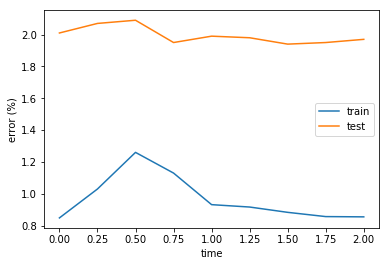

In [61]:
plt.plot(time, path['train'], label='train')
plt.plot(time, path['test'], label='test') 
plt.legend()
plt.xlabel('time')
plt.ylabel('error (%)')
plt.show()

In [62]:
path_l = {'test': [], 'train': []}
for t in tqdm(time):
    point = finder.find_point(t=t, method='lin_connect')
    path_l['test'].append(100-point['test']) 
    path_l['train'].append(100-point['train']) 

 11%|█         | 1/9 [00:14<01:57, 14.74s/it]

0.0 {'train': 99.15166666666667, 'test': 97.99}


 22%|██▏       | 2/9 [00:29<01:43, 14.74s/it]

0.25 {'train': 99.0, 'test': 97.92}


 33%|███▎      | 3/9 [00:44<01:28, 14.75s/it]

0.5 {'train': 98.76166666666667, 'test': 97.89}


 44%|████▍     | 4/9 [00:59<01:13, 14.75s/it]

0.75 {'train': 98.91, 'test': 98.03}


 56%|█████▌    | 5/9 [01:13<00:59, 14.75s/it]

1.0 {'train': 99.06833333333334, 'test': 98.00999999999999}


 67%|██████▋   | 6/9 [01:15<00:32, 10.72s/it]

1.25 {'train': 99.08666666666667, 'test': 98.02}


 78%|███████▊  | 7/9 [01:16<00:15,  7.90s/it]

1.5 {'train': 99.11666666666666, 'test': 98.05}


 89%|████████▉ | 8/9 [01:17<00:05,  5.92s/it]

1.75 {'train': 99.14, 'test': 98.03}


100%|██████████| 9/9 [01:18<00:00,  4.54s/it]

2.0 {'train': 99.14500000000001, 'test': 98.03}


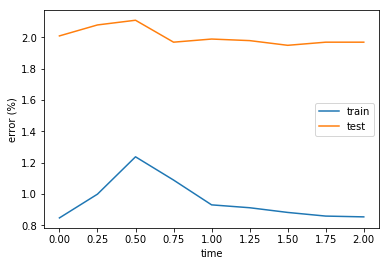

In [63]:
plt.plot(time, path_l['train'], label='train')
plt.plot(time, path_l['test'], label='test') 
plt.legend()
plt.xlabel('time')
plt.ylabel('error (%)')
plt.show()

# Count statistic in the fixed point

In [71]:
def get_stat(pointfinder, t=.5, method='arc_connect'):
    stat = {'test': [], 'train': []}
    for i in tqdm(range(1, 19)):
        model1.load_state_dict(torch.load('curves_mnist/LinearOneLayer/LongTraining/curve'+str(i)+'/checkpoint-30.pt')['model_state'])
        model2.load_state_dict(torch.load('curves_mnist/LinearOneLayer/LongTraining/curve'+str(i+1)+'/checkpoint-30.pt')['model_state'])
        finder = pointfinder(model1, model2) 
        point = finder.find_point(t=t, method=method)
        stat['test'].append(point['test']) 
        stat['train'].append(point['train']) 
    return stat

In [72]:
def get_mean_svd(stat):
    train = np.array(stat['train'])
    test = np.array(stat['test'])
    return train.mean(), train.std(), test.mean(), test.std()

In [ ]:
linpseudo = get_stat(PointFinderInverse2, t=.5, method='lin_connect')

  6%|▌         | 1/18 [00:29<08:17, 29.29s/it]

0.5 {'train': 98.75833333333334, 'test': 97.88}


 11%|█         | 2/18 [00:58<07:48, 29.29s/it]

0.5 {'train': 98.745, 'test': 97.89999999999999}


 17%|█▋        | 3/18 [01:27<07:19, 29.28s/it]

0.5 {'train': 98.75166666666667, 'test': 97.78}


In [79]:
linpseudo

{'test': [97.88,
  97.89999999999999,
  97.78,
  97.82,
  98.00999999999999,
  97.92,
  97.85000000000001,
  97.84,
  97.81,
  97.92999999999999,
  97.94,
  97.85000000000001,
  97.81,
  97.87,
  97.84,
  97.87,
  97.89999999999999,
  97.82],
 'train': [98.75833333333334,
  98.745,
  98.75166666666667,
  98.77666666666667,
  98.76666666666667,
  98.785,
  98.77666666666667,
  98.74666666666667,
  98.73833333333333,
  98.77,
  98.78166666666667,
  98.75333333333333,
  98.74666666666667,
  98.75833333333334,
  98.77333333333334,
  98.76666666666667,
  98.74333333333334,
  98.75500000000001]}

In [80]:
get_mean_svd(linpseudo)

(98.76074074074076,
 0.013902462503053823,
 97.86888888888889,
 0.055466595441547105)

In [ ]:
arcpseudo = get_stat(PointFinderInverse2, t=.5, method='arc_connect')

In [81]:
arcpseudo

{'test': [97.85000000000001,
  97.87,
  97.81,
  97.84,
  97.98,
  97.94,
  97.88,
  97.84,
  97.78999999999999,
  97.91,
  97.97,
  97.83,
  97.78,
  97.91,
  97.86,
  97.85000000000001,
  97.89,
  97.84],
 'train': [98.74833333333333,
  98.74666666666667,
  98.77,
  98.78166666666667,
  98.77166666666668,
  98.77,
  98.76666666666667,
  98.74166666666667,
  98.73166666666665,
  98.78,
  98.76166666666667,
  98.75666666666667,
  98.75500000000001,
  98.785,
  98.74666666666667,
  98.76833333333333,
  98.75166666666667,
  98.74333333333334]}

In [82]:
get_mean_svd(arcpseudo)

(98.75981481481482,
 0.014833321773703785,
 97.86888888888888,
 0.054760984579340165)

In [59]:
f_inv1 = np.linalg.pinv(funcs1.T)

In [60]:
f_inv2 = np.linalg.pinv(funcs2.T)

In [62]:
pred = W12 @ np.maximum(W11 @ np.maximum(W10 @ data.T, 0), 0)
accuracy(pred.T, targ)

95.27799999999999

In [70]:
pred = W12 @ np.maximum(W11 @ np.maximum(W10 @ data.T, 0), 0)
accuracy(pred.T, targ)

95.27799999999999

In [64]:
t=0.5
pred = Connector(W12.T, W22.T).arc_connect(t=t)[1].T @ np.maximum(Connector(W11, (W21 @ funcs2.T @ f_inv1)).arc_connect(t=t)[1] @  np.maximum(W10 @ data.T, 0), 0)
accuracy(pred.T, targ)

61.07

In [65]:
t = 0.5
pred = W22 @ np.maximum(Connector((W21 @ funcs2.T @ f_inv1).T, W21.T).arc_connect(t=t)[1].T @ np.maximum(Connector(W10, W20).arc_connect(t=t)[1]  @ data.T, 0), 0)
accuracy(pred.T, targ)

78.448